In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
cardata=pd.read_csv('Car_Model.csv')

In [5]:
cardata.shape

(398, 9)

In [6]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
Cylinders       398 non-null int64
displacement    398 non-null float64
Horsepower      398 non-null object
Weight          398 non-null int64
accelaration    398 non-null float64
ModelYear       398 non-null int64
Version         398 non-null int64
Carname         398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
cardata.dtypes

mpg             float64
Cylinders         int64
displacement    float64
Horsepower       object
Weight            int64
accelaration    float64
ModelYear         int64
Version           int64
Carname          object
dtype: object

In [8]:
cardata.describe(include='all')

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [9]:
cardata['Horsepower']=cardata.Horsepower.replace('?','NaN')

In [10]:
cardata.iloc[25:35]

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
29,27.0,4,97.0,88,2130,14.5,71,3,datsun pl510
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin
34,16.0,6,225.0,105,3439,15.5,71,1,plymouth satellite custom


In [11]:
cardata['Horsepower']=cardata['Horsepower'].astype(float)

In [12]:
cardata['Horsepower'].fillna((cardata['Horsepower'].mean()),inplace=True)

In [13]:
cardata.describe(include='all')

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [14]:
X=cardata[['ModelYear']]
y=cardata['mpg']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
# transforms the existing features to higher degree features.
X_train_poly = poly_reg.fit_transform(X_train)

In [17]:
# fit the transformed features to Linear Regression
from sklearn.linear_model import LinearRegression
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

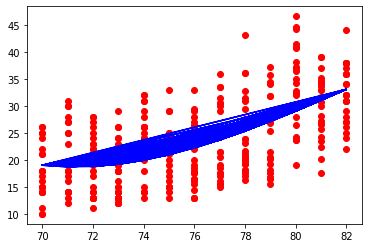

In [18]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,pol_reg.predict(X_train_poly),color='blue')

In [19]:
# predicting on training data-set
y_train_predict=pol_reg.predict(X_train_poly)

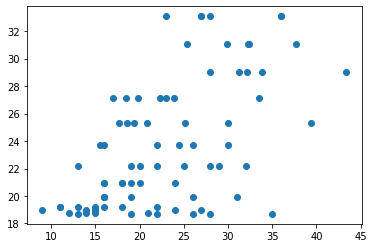

In [20]:
# predicting on test data-set
y_test_predict=pol_reg.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_test_predict)
plt.show()

In [21]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE: ',metrics.mean_squared_error(y_train,y_train_predict))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))

MAE:  5.3075205040890605
MSE:  38.96788747865034
RMSE:  6.2424264095502435


In [22]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_test_predict))
print('MSE: ',metrics.mean_squared_error(y_test,y_test_predict))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))

MAE:  5.1475407180595045
MSE:  37.30482616453728
RMSE:  6.107767690780101


In [23]:
r2_train=pol_reg.score(X_train_poly,y_train)
r2_train

0.3718171984966323

In [24]:
from sklearn.metrics import r2_score
r2_predict=r2_score(y_train,y_train_predict)
r2_predict

0.3718171984966323

In [25]:
r2_test=r2_score(y_test,y_test_predict)
r2_test

0.33321102410742887

In [26]:
X1=cardata[['ModelYear','Cylinders']]
y1=cardata['mpg']

In [27]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=100)

In [28]:
poly_reg = PolynomialFeatures(degree=3)
X1_train_poly = poly_reg.fit_transform(X1_train)

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X1_train_poly,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y1_train_pred = lin_reg.predict(X1_train_poly)

In [31]:
y1_test_pred = lin_reg.predict(poly_reg.fit_transform(X1_test))

In [32]:
print('MAE:', metrics.mean_absolute_error(y1_train, y1_train_pred))
print('MSE:', metrics.mean_squared_error(y1_train, y1_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, y1_train_pred)))

MAE: 2.792203332831709
MSE: 14.501158065242507
RMSE: 3.808038611311932


In [33]:
print('MAE:', metrics.mean_absolute_error(y1_test, y1_test_pred))
print('MSE:', metrics.mean_squared_error(y1_test, y1_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_test_pred)))

MAE: 2.7147925189604942
MSE: 13.911901940258394
RMSE: 3.729866209431431


In [34]:
r2_x1_train = r2_score(y1_train,y1_train_pred)
r2_x1_train

0.7662337199198179

In [35]:
r2_x1_test = r2_score(y1_test,y1_test_pred)
r2_x1_test

0.751337727549016

In [36]:
X2=cardata[['ModelYear','Cylinders','displacement']]
y2=cardata['mpg']

In [37]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=100)

In [38]:
poly_reg=PolynomialFeatures(degree=3)
X2_train_poly=poly_reg.fit_transform(X2_train)

In [39]:
lin_reg=LinearRegression()
lin_reg.fit(X2_train_poly,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y2_train_pred=lin_reg.predict(X2_train_poly)

In [41]:
y2_test_pred=lin_reg.predict(poly_reg.fit_transform(X2_test))

In [42]:
print('MAE:', metrics.mean_absolute_error(y2_train, y2_train_pred))
print('MSE:', metrics.mean_squared_error(y2_train, y2_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_train, y2_train_pred)))

MAE: 2.031721352731397
MSE: 7.9401148473573775
RMSE: 2.8178209395483913


In [43]:
print('MAE:', metrics.mean_absolute_error(y2_test, y2_test_pred))
print('MSE:', metrics.mean_squared_error(y2_test, y2_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_test_pred)))

MAE: 2.1302319554872042
MSE: 8.269928413255109
RMSE: 2.875748322307623


In [44]:
r2_x2_train= r2_score(y2_train,y2_train_pred)
r2_x2_train

0.8720011806694892

In [45]:
r2_x2_test = r2_score(y2_test,y2_test_pred)
r2_x2_test

0.852182742440407

In [48]:
X3=cardata[['ModelYear','Version','accelaration','Weight','displacement','Cylinders','Horsepower']]
y3=cardata['mpg']

In [55]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.2,random_state=100)

In [73]:
poly_reg=PolynomialFeatures(degree=1)
X3_train_poly=poly_reg.fit_transform(X3_train)

In [74]:
lin_reg=LinearRegression()
lin_reg.fit(X3_train_poly,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y3_train_pred=lin_reg.predict(X3_train_poly)

In [79]:
y3_test_pred=lin_reg.predict(poly_reg.fit_transform(X3_test))

In [80]:
print('MAE:', metrics.mean_absolute_error(y3_train, y3_train_pred))
print('MSE:', metrics.mean_squared_error(y3_train, y3_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_train, y3_train_pred)))

MAE: 2.558746627381532
MSE: 11.378417758034649
RMSE: 3.3731910349155516


In [81]:
r2_x3_train= r2_score(y3_train,y3_train_pred)
r2_x3_train

0.8165739328868171

In [82]:
print('MAE:', metrics.mean_absolute_error(y3_test, y3_test_pred))
print('MSE:', metrics.mean_squared_error(y3_test, y3_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, y3_test_pred)))

MAE: 2.372037377820041
MSE: 9.15765163504532
RMSE: 3.026161204404901


In [83]:
r2_x3_test= r2_score(y3_test,y3_test_pred)
r2_x3_test

0.8363155177729391

In [84]:
poly_reg=PolynomialFeatures(degree=2)
X3_train_poly=poly_reg.fit_transform(X3_train)

In [85]:
lin_reg=LinearRegression()
lin_reg.fit(X3_train_poly,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y3_train_pred=lin_reg.predict(X3_train_poly)

In [87]:
y3_test_pred=lin_reg.predict(poly_reg.fit_transform(X3_test))

In [88]:
print('MAE:', metrics.mean_absolute_error(y3_train, y3_train_pred))
print('MSE:', metrics.mean_squared_error(y3_train, y3_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_train, y3_train_pred)))

MAE: 1.8831609454963212
MSE: 6.778652544766019
RMSE: 2.60358455686886


In [89]:
r2_x3_train= r2_score(y3_train,y3_train_pred)
r2_x3_train

0.8907245626717115

In [90]:
print('MAE:', metrics.mean_absolute_error(y3_test, y3_test_pred))
print('MSE:', metrics.mean_squared_error(y3_test, y3_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, y3_test_pred)))

MAE: 1.7903247732066538
MSE: 5.649744915823796
RMSE: 2.3769192068355616


In [91]:
r2_x3_test= r2_score(y3_test,y3_test_pred)
r2_x3_test

0.899016078781314

In [92]:
poly_reg=PolynomialFeatures(degree=3)
X3_train_poly=poly_reg.fit_transform(X3_train)

In [93]:
lin_reg=LinearRegression()
lin_reg.fit(X3_train_poly,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
y3_train_pred=lin_reg.predict(X3_train_poly)

In [98]:
y3_test_pred=lin_reg.predict(poly_reg.fit_transform(X3_test))

In [100]:
print('MAE:', metrics.mean_absolute_error(y3_train, y3_train_pred))
print('MSE:', metrics.mean_squared_error(y3_train, y3_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_train, y3_train_pred)))

MAE: 1.8633296086219715
MSE: 5.745978243762125
RMSE: 2.3970770208239296


In [101]:
r2_x3_train= r2_score(y3_train,y3_train_pred)
r2_x3_train

0.9073718144838754

In [102]:
print('MAE:', metrics.mean_absolute_error(y3_test, y3_test_pred))
print('MSE:', metrics.mean_squared_error(y3_test, y3_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, y3_test_pred)))

MAE: 2.767232652183168
MSE: 16.474150753468294
RMSE: 4.058836132867191


In [103]:
r2_x3_test= r2_score(y3_test,y3_test_pred)
r2_x3_test

0.7055399196566339